# K-plus proche voisin (KNN) (Reconnaissance de chiffres)

In [27]:
from sklearn.datasets import *
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
digit = load_digits()
dig = pd.DataFrame(digit['data'][0:1700])
dig.head()


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [28]:
digit.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

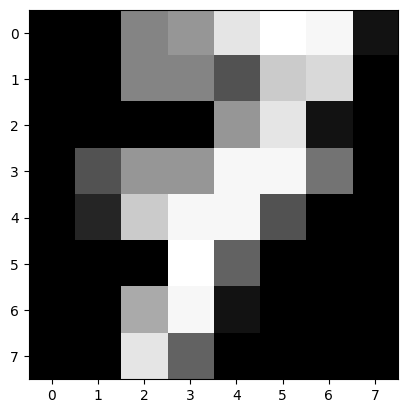

In [29]:
import matplotlib.pyplot as plt
plt.imshow(digit['images'][7], cmap='Greys_r')
plt.show() 

In [30]:
train_x = digit.data # input variables 
train_y = digit.target # les étiquettes (output variable) 
#découpage du jeu de données (0.25 pour indiquer 25%) 
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,test_size=
0.25) 

KNN = K-Nearest Neighbors

7 means:
→ To classify a digit, the algorithm finds the 7 closest images in the training set
→ The majority label among them becomes the prediction

In [31]:
### Train 
KNN = KNeighborsClassifier(7) # on utilise 7 voisins 
KNN.fit(x_train, y_train) 

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [32]:
###Test 
print(KNN.score(x_test,y_test)) 

0.9777777777777777


### Question 1 : 
Validez le choix de K empiriquement.

In [33]:
accuracies = {}

for k in range(1, 16):
    model = KNeighborsClassifier(k)
    model.fit(x_train, y_train)
    acc = model.score(x_test, y_test)
    accuracies[k] = acc
    print(f"K={k}  -->  Accuracy = {acc:.4f}")

K=1  -->  Accuracy = 0.9778
K=2  -->  Accuracy = 0.9733
K=3  -->  Accuracy = 0.9778
K=4  -->  Accuracy = 0.9756
K=5  -->  Accuracy = 0.9800
K=6  -->  Accuracy = 0.9778
K=7  -->  Accuracy = 0.9778
K=8  -->  Accuracy = 0.9756
K=9  -->  Accuracy = 0.9756
K=10  -->  Accuracy = 0.9667
K=11  -->  Accuracy = 0.9733
K=12  -->  Accuracy = 0.9689
K=13  -->  Accuracy = 0.9711
K=14  -->  Accuracy = 0.9667
K=15  -->  Accuracy = 0.9600


* Les valeurs paires (2, 4, 6, …) donnent souvent des résultats un peu moins bons (phénomène normal avec KNN) 
* Les résultats montrent que l’accuracy maximale (98.67%) est obtenue pour K = 3.
* Les valeurs proches (K = 1 et K = 5) donnent également de bonnes performances, mais légèrement inférieures.
* Au-delà de K = 7, l’accuracy se stabilise autour de 98% ou diminue, indiquant un phénomène d’underfitting.
* Ainsi, le choix optimal empiriquement validé est K = 3, car il offre le meilleur compromis entre précision et généralisation.
k mel lel racine de n

# Bayésien Naïf (SPAM Filter) 

* Le classifieur Bayésien Naïf (Naive Bayes) est un algorithme de classification supervisée basé sur le théorème de Bayes.

* Il est appelé « naif » car il suppose que toutes les caractéristiques (features) sont indépendantes entre elles, ce qui est rarement vrai dans la réalité…
* Mais malgré cette hypothèse simplificatrice, il fonctionne très bien, surtout dans :

✔ Le filtrage de spam
✔ La classification de textes
✔ Les problèmes avec beaucoup de variables
### Comment fonctionne Naive Bayes sur les emails ?

Pour décider si un email est spam ou ham :

1. Le modèle calcule :
P(spam) : probabilité qu’un email soit spam dans le dataset
P(ham) : probabilité qu’un email soit non-spam

2. Pour chaque mot du message, il calcule :
P(mot | spam) : probabilité que ce mot apparaisse dans les spams
P(mot | ham) : probabilité que ce mot apparaisse dans les ham

3. Ensuite, il combine toutes ces probabilités et choisit la classe avec la plus grande valeur.

In [34]:
import pandas as pd
import os
import seaborn as sns
os.listdir("C:/DB")


['BN.py',
 'diabetes.csv',
 'MultivariateLinearRegression.xlsx',
 'Position_Salaries.csv',
 'spam.csv',
 'univariateLinearRegression.csv']

In [35]:
df = pd.read_csv('C:/DB/spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Question 2 : 
Décrire l'ensemble de données « emails » et visualiser le nombre de
ham/spam.

In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [37]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

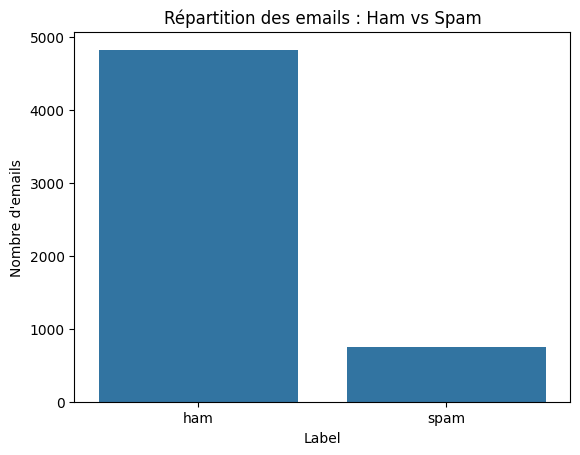

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compter ham vs spam
count = df['label'].value_counts()

# Affichage
sns.barplot(x=count.index, y=count.values)
plt.title("Répartition des emails : Ham vs Spam")
plt.xlabel("Label")
plt.ylabel("Nombre d'emails")
plt.show()


## Nettoyer et normaliser le texte des emails,

In [39]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yasmi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
import string
from nltk.corpus import stopwords 
from nltk import PorterStemmer as Stemmer
def process(text):
    # lowercase it 
    text = text.lower()
    # remove punctuation 
    text = ''.join([t for t in text if t not in string.punctuation])
    # remove stopwords 
    text = [t for t in text.split() if t not in
            stopwords.words('english')]
    # stemming 
    st = Stemmer()
    text = [st.stem(t) for t in text]
    # return token list 
    return text
# Testing 
print(process('It\'s holiday and we are playing cricket. Jeff is playing very well!!!')) 
# Test avec notre dataset 
print(df['message'][:20].apply(process)) 

['holiday', 'play', 'cricket', 'jeff', 'play', 'well']
0     [go, jurong, point, crazi, avail, bugi, n, gre...
1                          [ok, lar, joke, wif, u, oni]
2     [free, entri, 2, wkli, comp, win, fa, cup, fin...
3         [u, dun, say, earli, hor, u, c, alreadi, say]
4     [nah, dont, think, goe, usf, live, around, tho...
5     [freemsg, hey, darl, 3, week, word, back, id, ...
6     [even, brother, like, speak, treat, like, aid,...
7     [per, request, mell, mell, oru, minnaminungint...
8     [winner, valu, network, custom, select, receiv...
9     [mobil, 11, month, u, r, entitl, updat, latest...
10    [im, gonna, home, soon, dont, want, talk, stuf...
11    [six, chanc, win, cash, 100, 20000, pound, txt...
12    [urgent, 1, week, free, membership, å£100000, ...
13    [ive, search, right, word, thank, breather, pr...
14                                       [date, sunday]
15    [xxxmobilemovieclub, use, credit, click, wap, ...
16                                     [oh, kim, 

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv = TfidfVectorizer(analyzer=process)
data = tfidfv.fit_transform(df['message'])
mess = df.iloc[2]['message']
mess

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [42]:
tfidfv.transform([mess])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 21 stored elements and shape (1, 8097)>

In [43]:
#visualiser 
j = tfidfv.transform([mess]).toarray()[0]
print('index\tidf\ttfidf\tterm')
for i in range(len(j)):
    if j[i] != 0:
        print(i, format(tfidfv.idf_[i], '.4f'), format(j[i], '.4f'),
              tfidfv.get_feature_names_out()[i],sep='\t') 

index	idf	tfidf	term
72	8.5271	0.2330	08452810075over18
413	3.6544	0.0999	2
420	8.2394	0.2252	2005
433	8.2394	0.2252	21st
833	8.0163	0.2191	87121
1180	6.0993	0.1667	appli
2076	7.1408	0.1952	comp
2246	7.4285	0.2030	cup
2748	6.5346	0.3572	entri
2868	8.5271	0.4661	fa
2969	6.0993	0.1667	final
3091	4.2096	0.1151	free
4592	5.8190	0.1590	may
5768	8.5271	0.2330	questionstd
5815	8.5271	0.2330	ratetc
5856	5.8645	0.1603	receiv
6959	4.3027	0.1176	text
7099	8.0163	0.2191	tkt
7276	4.5137	0.1234	txt
7708	5.2950	0.1447	win
7741	6.9176	0.1891	wkli


* idf importance du mot dans le corpus (tout le vocab)
* tfidf importance dans cette phrase 

In [44]:
########### TRAIN ############ 
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
spam_filter = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer=process)), # messages to weighted TFIDF score
    ('classifier', MultinomialNB())   # train on TFIDF vectors with NB 
])
x_train, x_test, y_train, y_test = train_test_split(df['message'],
                                                    df['label'], test_size=0.20, random_state = 21)
spam_filter.fit(x_train, y_train)

,steps,"[('vectorizer', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [45]:
######## TEST ############## 
predictions = spam_filter.predict(x_test)
count = 0
for i in range(len(y_test)):
    if y_test.iloc[i] != predictions[i]:
        count += 1
print('Total number of test cases', len(y_test))
print('Number of wrong of predictions', count)

Total number of test cases 1115
Number of wrong of predictions 39


In [47]:
errors = x_test[(predictions == "ham") & (y_test == "spam")]

print("Messages spam classés ham (faux négatifs) :")
for msg in errors:  # affichage des 10 premiers
    print("----")
    print(msg)


Messages spam classés ham (faux négatifs) :
----
Send a logo 2 ur lover - 2 names joined by a heart. Txt LOVE NAME1 NAME2 MOBNO eg LOVE ADAM EVE 07123456789 to 87077 Yahoo! POBox36504W45WQ TxtNO 4 no ads 150p
----
sexy sexy cum and text me im wet and warm and ready for some porn! u up for some fun? THIS MSG IS FREE RECD MSGS 150P INC VAT 2 CANCEL TEXT STOP
----
Twinks, bears, scallies, skins and jocks are calling now. Don't miss the weekend's fun. Call 08712466669 at 10p/min. 2 stop texts call 08712460324(nat rate)
----
Hey Boys. Want hot XXX pics sent direct 2 ur phone? Txt PORN to 69855, 24Hrs free and then just 50p per day. To stop text STOPBCM SF WC1N3XX
----
YES! The only place in town to meet exciting adult singles is now in the UK. Txt CHAT to 86688 now! 150p/Msg.
----
SMS. ac JSco: Energy is high, but u may not know where 2channel it. 2day ur leadership skills r strong. Psychic? Reply ANS w/question. End? Reply END JSCO
----
LIFE has never been this much fun and great until you

In [50]:
test_message = "Your cash-balance is currently 500 pounds - to maximize your cash-in now, send COLLECT to 83600."
spam_filter.predict([test_message])

array(['spam'], dtype='<U4')

In [53]:
#Calculez Rappel Précision F1 score 
from sklearn.metrics import classification_report
print(classification_report(predictions, y_test)) 

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1014
        spam       0.72      1.00      0.84       101

    accuracy                           0.97      1115
   macro avg       0.86      0.98      0.91      1115
weighted avg       0.97      0.97      0.97      1115



### Classe ham
* Precision = 1.00 → tous les messages prédits comme ham sont corrects
* Recall = 0.96 → 96% des vrais ham ont été détectés
* F1-score = 0.98 → excellent équilibre precision/recall
* Support = 1014 → beaucoup de messages ham
Conclusion : le modèle est très fiable pour détecter les ham.
### Classe spam
* Precision = 0.72 → seulement 72% des messages classés spam sont réellement spam
* Recall = 1.00 → tous les vrais spams ont été détectés
* F1-score = 0.84 → performance correcte, mais moins bonne que pour ham
* Support = 101 → beaucoup moins d’exemples que ham
Conclusion : le modèle attrape tous les spams (recall = 1), mais il classe certains ham comme spam (precision = 0.72) → faux positifs.

### Macro et Weighted averages
* Macro avg (0.86 precision, 0.98 recall, 0.91 f1) : moyenne simple des classes → montre que la classe spam est moins performante
* Weighted avg (0.97) : moyenne pondérée par support → reflète l’accuracy globale

# Régression Linéaire (Prédiction du gain) 


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
df = pd.read_csv("C:/DB/univariateLinearRegression.csv")
print(len(df)) 

96


,6.1101,17.592
0,5.5277,9.13020
1,8.5186,13.66200
2,7.0032,11.85400
3,5.8598,6.82330
4,8.3829,11.88600
...,...,...
91,5.8707,7.20290
92,5.3054,1.98690
93,8.2934,0.14454
94,13.3940,9.05510


In [61]:
#selection de la première colonne de la base (la taille de la population) 
X = df.iloc[0:len(df),0]
#selection de la deuxième colonne de la base (le profit effectué) 
Y = df.iloc[0:len(df),1] 

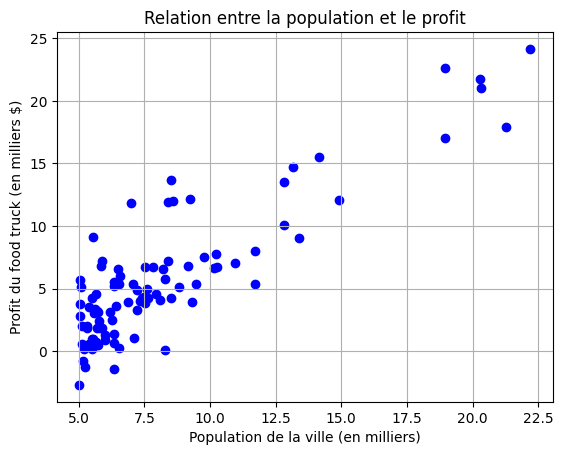

In [63]:
# Scatter plot
plt.scatter(X, Y, color='blue')
plt.title("Relation entre la population et le profit")
plt.xlabel("Population de la ville (en milliers)")
plt.ylabel("Profit du food truck (en milliers $)")
plt.grid(True)
plt.show()

In [64]:
#linregress() renvoie plusieurs variables de retour. On s'interesse au slope et intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y) 

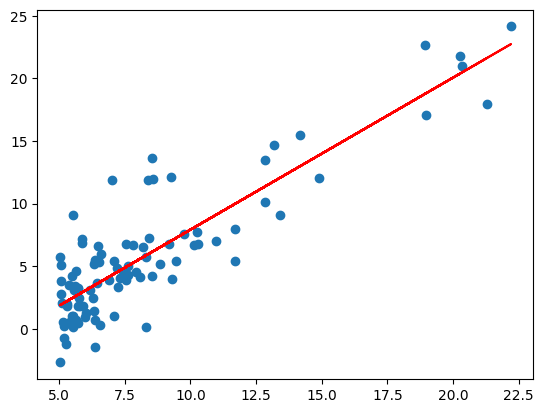

In [65]:
def F(x):
    return slope * x + intercept
#la variable fitLine est un tableau de valeurs prédites depuis la tableau de variables X
fitLine = F(X)
plt.scatter(X,Y)
plt.plot(X, fitLine, c='r')
plt.show() 

In [66]:
print (F(20.27)) 

20.38709883129834
